# Homework

In this activity, more challenging than the last, you will build a Twitter bot that sends out visualized sentiment analysis of a Twitter account's recent tweets.

Visit <https://twitter.com/PlotBot5> for an example of what your script should do.

The bot receives tweets via mentions and in turn performs sentiment analysis on the most recent twitter account specified in the mention

For example, when a user tweets, **"@PlotBot Analyze: @CNN,"** it will trigger a sentiment analysis on the CNN twitter feed.

A plot from the sentiment analysis is then tweeted to the PlotBot5 twitter feed. See below for examples of scatter plots you will generate:


Hints, requirements, and considerations:

* Your bot should scan your account every **five minutes** for mentions.
* Your bot should pull 500 most recent tweets to analyze for each incoming request.
* Your script should prevent abuse by analyzing **only** Twitter accounts that have not previously been analyzed.
* Your plot should include meaningful legend and labels.
* It should also mention the Twitter account name of the requesting user.
* When submitting your assignment, be sure to have at least **three** analyses tweeted out from your account (enlist the help of classmates, friends, or family, if necessary!).
* Notable libraries used to complete this application include: Matplotlib, Pandas, Tweepy, and Vader.
* You may find it helpful to organize your code in function(s), then call them.
* If you're not yet familiar with creating functions in Python, here is a tutorial you may wish to consult: <https://www.tutorialspoint.com/python/python_functions.htm>.



In [1]:
# Dependencies
import time 
import requests
import datetime
import tweepy
import pandas as pd
from datetime import datetime
from pprint import pprint    

import matplotlib.pyplot as plt
plt.style.use('bmh')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Import OpenWeatherMap API key
import apikeys

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(apikeys.twit_key, apikeys.twit_secret_key)
auth.set_access_token(apikeys.twit_token, apikeys.twit_secret_token)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Part 1 - Sentiment Analysis Function

In [8]:
def sentiment_analysis(user):
 
    #Target User Account
    target_user = user

    # Variables for holding sentiments
    tweet_time_list = []
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []


    # Get all tweets from home feed

    try:

        for x in range(5):

            public_tweets = api.user_timeline(target_user, count = 100, 
                                          result_type="recent", page = x) 

            #pprint(public_tweets)

            # Loop through all tweets
            for tweet in public_tweets:

                #Tweet time
                timestamp = tweet['created_at']
                #timestamp = datetime.strptime(tweet['created_at'], "%a %b %d %H:%M:%S $z %Y")
                tweet_time_list.append(timestamp)
                #'created_at': 'Mon Jun 25 09:30:06 +0000 2018'


                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]

                # Add each value to the appropriate list
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)

        #Create Dictionary with Results

        data_dict = {
            "Time": tweet_time_list,
            "Compound": compound_list,
            "Positive": positive_list,
            "Neutral": neutral_list,
            "Negative": negative_list
        }

        #Set up as Data Frame and set Time as index
        data = pd.DataFrame(data_dict)
        data["Avg_Compound"] = data.Compound.mean()

        data.Time = pd.to_datetime(data.Time)
        data.set_index(data.Time)
        data.describe()


        # Plot the compound score as a function of the tweet's creation date.
        plt.figure(figsize = (12,5))
        plt.stem(data.Time, data.Compound, marker ="o", markersize = 10, alpha = 0.4, label = "Individual Tweets")
        plt.plot(data.Time, data.Avg_Compound, color = 'red', linestyle = '--', label = "Average")
        plt.legend()    
        plt.title(f"Sentiment Analysis: {target_user} Tweets Over Time")
        plt.xlabel("Time")
        plt.ylabel("Tweet Polarity")
        plt.xticks(rotation = '30')
        plt.savefig('Sentiment_analysis.png') 
        plt.show()
        
        #Post analysis on twitter
        api.update_with_media('Sentiment_analysis.png',
                              f"Here is the analysis requested for {user}")

    except : 
        print("Twitter account invalid")



# Optionally, tweet the .png file with the results of th analysis

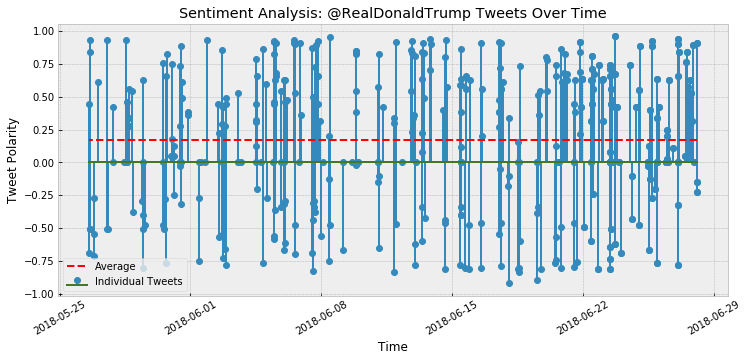

In [9]:
sentiment_analysis("@RealDonaldTrump")



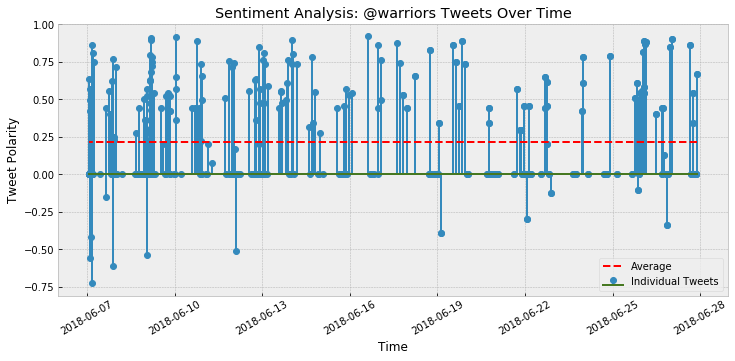

In [10]:
sentiment_analysis("@warriors")


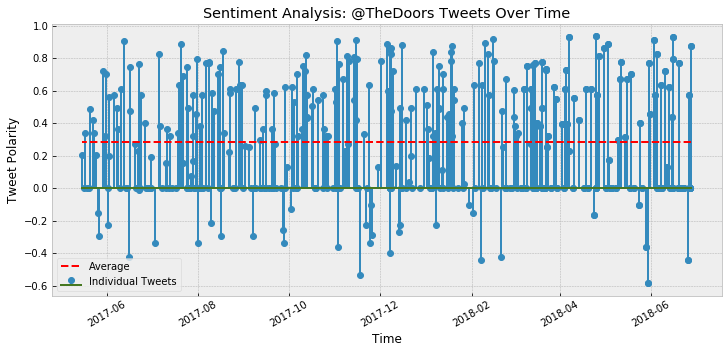

In [12]:
sentiment_analysis("@TheDoors")

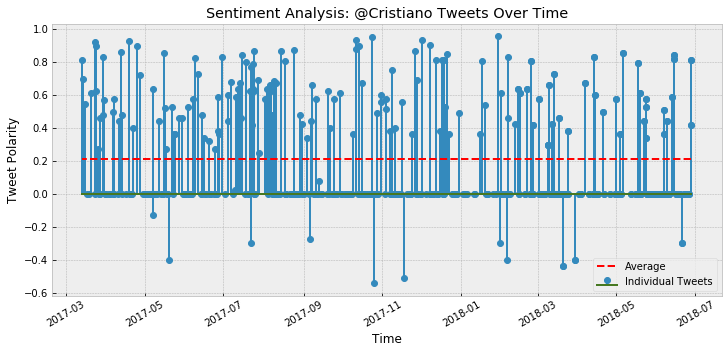

In [13]:
sentiment_analysis("@Cristiano")